# World Marriage Analysis

## Import Packages 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Load the Data 

In [3]:
path = r"C:\Users\bunmi\PycharmProjects\data_eng\database\marriage.csv"

df = pd.read_csv(path)

## Copy the DataFrame

In [51]:
marriage_df = df.copy()

## EDA

In [52]:
# see the first five rows
marriage_df.head()

,Sr.No.,Country,AgeGroup,Sex,MaritalStatus,DataProcess,Data Collection (Start Year),Data Collection (End Year),Data Source
0,1,Afghanistan,[15-19],Man,Divorced,Survey,1972,1974,National statistics
1,2,Afghanistan,[20-24],Man,Divorced,Survey,1972,1974,National statistics
2,3,Afghanistan,[25-29],Man,Divorced,Survey,1972,1974,National statistics
3,4,Afghanistan,[30-34],Man,Divorced,Survey,1972,1974,National statistics
4,5,Afghanistan,[35-39],Man,Divorced,Survey,1972,1974,National statistics


In [53]:
# see the last five rows
marriage_df.tail()

,Sr.No.,Country,AgeGroup,Sex,MaritalStatus,DataProcess,Data Collection (Start Year),Data Collection (End Year),Data Source
271599,271600,Zimbabwe,[55-59],Woman,Widowed,Survey,2017,2017,National statistics
271600,271601,Zimbabwe,[60-64],Woman,Widowed,Survey,2017,2017,National statistics
271601,271602,Zimbabwe,[65-69],Woman,Widowed,Survey,2017,2017,National statistics
271602,271603,Zimbabwe,[70-74],Woman,Widowed,Survey,2017,2017,National statistics
271603,271604,Zimbabwe,[75+],Woman,Widowed,Survey,2017,2017,National statistics


In [54]:
# see randow samples
marriage_df.sample(10)

,Sr.No.,Country,AgeGroup,Sex,MaritalStatus,DataProcess,Data Collection (Start Year),Data Collection (End Year),Data Source
111842,111843,Iceland,[10-14],Man,Married,Estimate,1991,1991,UNSD
43999,44000,"China, Macao SAR",[10-14],Man,Divorced,Census,2006,2006,UNSD
114122,114123,Iceland,[75+],Woman,Widowed,Census,2011,2011,Eurostat
218023,218024,Seychelles,[30-34],Woman,Married,Census,1981,1982,INED
60433,60434,Denmark,[15-19],Man,Single,Estimate,1979,1979,UNSD
90987,90988,Ghana,[50-54],Man,Married,Survey,2008,2008,DHS_HH
58115,58116,Czechia,[45-49],Woman,Widowed,Estimate,2018,2018,UNSD
20089,20090,Bolivia (Plurinational State of),[70+],Man,Divorced or Separated,Census,1992,1992,UNSD
98721,98722,Guinea,[60-64],Man,Divorced,Census,1983,1983,INED
25591,25592,Bulgaria,[35-39],Man,Divorced,Estimate,2018,2018,UNSD


In [55]:
# Get the number of rows and columns 
marriage_df.shape

(271604, 9)

In [56]:
# See the columns present in the dataframe
marriage_df.columns 

Index(['Sr.No.', 'Country', 'AgeGroup', 'Sex', 'MaritalStatus', 'DataProcess',
       'Data Collection (Start Year)', 'Data Collection (End Year)',
       'Data Source'],
      dtype='object')

In [57]:
marriage_df.index 

RangeIndex(start=0, stop=271604, step=1)

In [58]:
# Information about columns, missing values and datatypes
marriage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271604 entries, 0 to 271603
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Sr.No.                        271604 non-null  int64 
 1   Country                       271604 non-null  object
 2   AgeGroup                      271604 non-null  object
 3   Sex                           271604 non-null  object
 4   MaritalStatus                 271604 non-null  object
 5   DataProcess                   271604 non-null  object
 6   Data Collection (Start Year)  271604 non-null  int64 
 7   Data Collection (End Year)    271604 non-null  int64 
 8   Data Source                   271604 non-null  object
dtypes: int64(3), object(6)
memory usage: 18.6+ MB


In [59]:
# Check for duplicate
type(marriage_df)

pandas.core.frame.DataFrame

In [60]:
marriage_df.duplicated().sum()

0

In [61]:
list_of_columns = ["Country", "AgeGroup", "Sex"]

In [62]:
marriage_df[list_of_columns].head()

,Country,AgeGroup,Sex
0,Afghanistan,[15-19],Man
1,Afghanistan,[20-24],Man
2,Afghanistan,[25-29],Man
3,Afghanistan,[30-34],Man
4,Afghanistan,[35-39],Man


In [63]:
marriage_df.columns

Index(['Sr.No.', 'Country', 'AgeGroup', 'Sex', 'MaritalStatus', 'DataProcess',
       'Data Collection (Start Year)', 'Data Collection (End Year)',
       'Data Source'],
      dtype='object')

In [64]:
 new_names = ['serial_number', 'country', 'age_group', 'sex', 'marital_status', 
              'data_process',  'start_year', 'end_year', 'data_source']

In [65]:
marriage_df.columns = new_names

In [66]:
marriage_df.sample(2)

,serial_number,country,age_group,sex,marital_status,data_process,start_year,end_year,data_source
253980,253981,United Arab Emirates,[40-44],Man,Single,Census,2005,2005,UNSD
168731,168732,Nepal,[40-44],Woman,Widowed,Survey,2011,2011,DHS_STATcompiler


In [71]:
marriage_df['marital_status'].value_counts()

marital_status
Widowed                                          57002
Married                                          53955
Divorced                                         51269
Single                                           48472
Separated                                        17766
Consensual union                                 11279
Never married                                    10429
Divorced or Separated                             4886
Living together                                   4536
Not living together                               4335
Married or in consensual union                    2314
Married or married but separated                  1520
Married or Living together                         892
Currently not married                              607
Ever married                                       509
Widowed or divorced                                290
Consensual union, not living together              265
Not in union                                      

In [74]:
marriage_df['country'].value_counts().head(20)

country
Norway                      6585
Hungary                     6110
Iceland                     5823
Sweden                      5700
Denmark                     5581
Netherlands                 5340
Canada                      5302
Finland                     5261
United States of America    4040
France                      3944
Greenland                   3731
Switzerland                 3634
San Marino                  3471
Israel                      3213
Costa Rica                  3166
Liechtenstein               3155
Czechia                     2939
Italy                       2658
Senegal                     2541
Slovenia                    2521
Name: count, dtype: int64

In [88]:
#marriage_df[marriage_df['start_year']==1974]

divorced = marriage_df['marital_status'] == 'Divorced'

In [91]:
marriage_df[divorced]['country'].value_counts().head(10)

country
Hungary        1398
Sweden         1351
Denmark        1305
Norway         1265
Netherlands    1260
Finland        1224
Canada         1104
Iceland        1084
France          945
Greenland       890
Name: count, dtype: int64

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

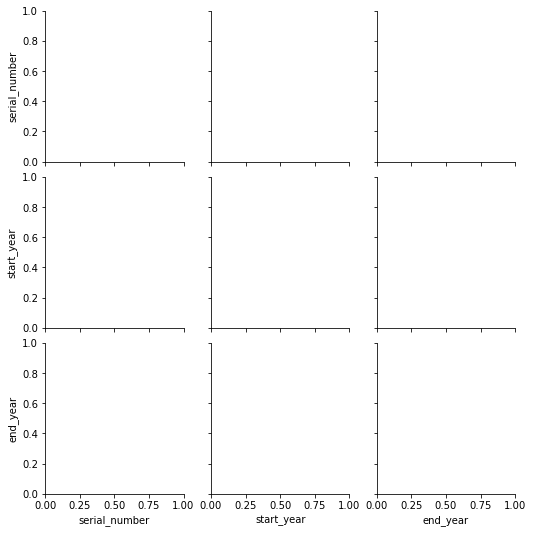

In [97]:
sns.pairplot(marriage_df, hue='sex', palette='coolwarm', markers=["o", "s"])
plt.show()

In [ ]:
!pip uninstall pandas seaborn matplotlib
!pip install seaborn